<a name='section0'></a>
# Lecture 16 Convolutional Neural Networks

- [16.1 Introduction to Convolutional Neural Networks](#section1)
- [16.2 Loading the Dataset](#section2)
- [16.3 Creating, Training, and Evaluating a CNN Model](#section3)
- [16.4 Introduce a Validation Dataset](#section4)
- [16.5 Dropout Layers](#section5)
- [16.6 Batch Normalization](#section6)
- [16.7 Data Augmentation](#section7)
- [16.8 Transfer Learning](#section8)
- [16.9 Saving and Loading the Model](#section9)
- [References](#section10)

<a name='section1'></a>

# 16.1 Introduction to Convolutional Neural Networks

***Convolutional Neural Networks (CNN)***, also known as ***ConvNets*** is a neural network architecture that has accelerated various computer vision tasks, such as image recognition and classification, image segmentation, and object detection. CNN has been used in related applications, including autonomous vehicles, medical image diagnosis, intelligent robots, and others.

A typical architecture of CNN is shown below and consists of 3 main types of layers: convolutional layers, pooling layers, and fully-connected (dense) layers. The networks typically have multiple blocks of convolutional and pooling layers, followed by fully-connected layers. The optimal number of layers is task-dependent, and it is a hyperparameter that needs to be tuned by the user during the training and model selection step.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


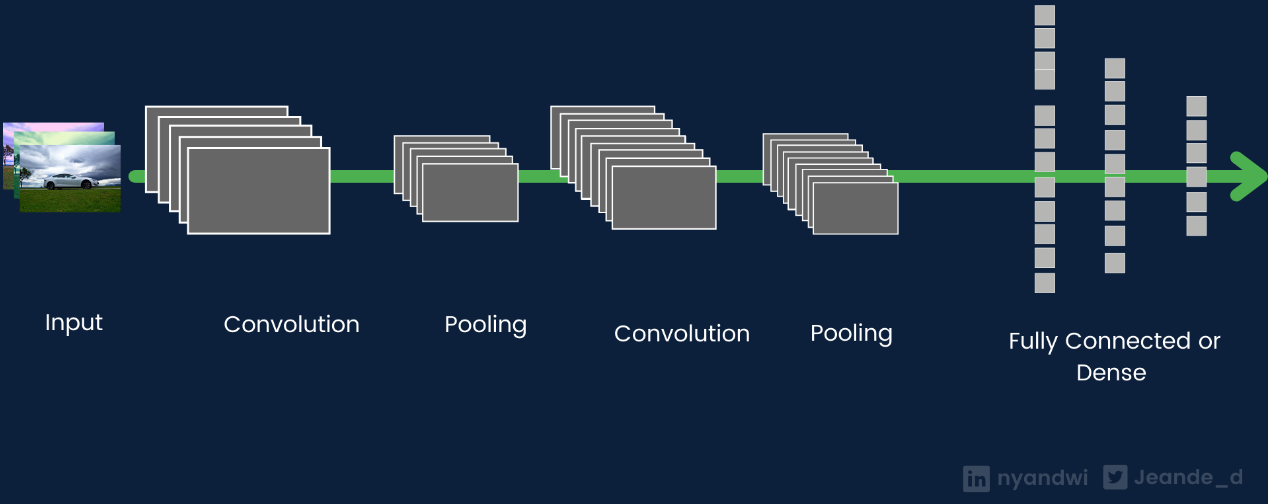

In [122]:
from IPython import display
display.Image("drive/MyDrive/Data_Science_Course/Lecture16-ConvNet/images/cnn_layers.png", width = 800)


Each layer in CNN transforms the input images into a higher-level representation. The initial layers in CNN learn low-level features (such as edges and lines), the middle layers learn mid level features (e.g., textures and parts), and the last layers learn high-level features (such as objects). The fully-connected layers use the high-level features to classify the input image.

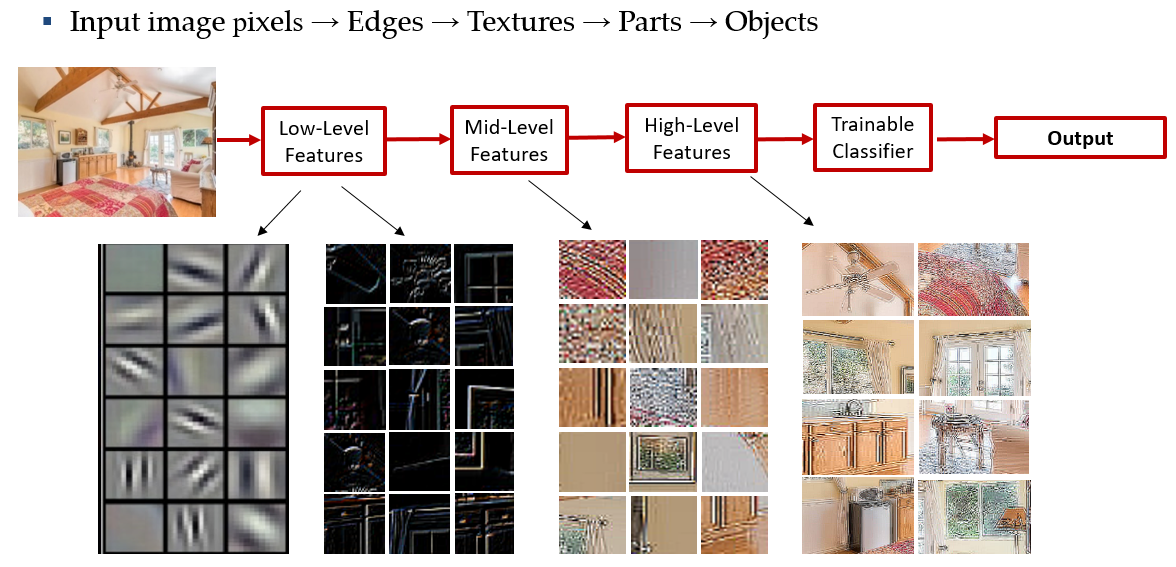

In [124]:
display.Image("drive/MyDrive/Data_Science_Course/Lecture16-ConvNet/images/cnn_features.png", width = 900)

### Convolutional Layers

The process of convolution is to pass a convolutional filter to each pixel in an image, multiply the corresponding pixels and calculate the sum. This process is repeated until the filter is slid over all image pixels.

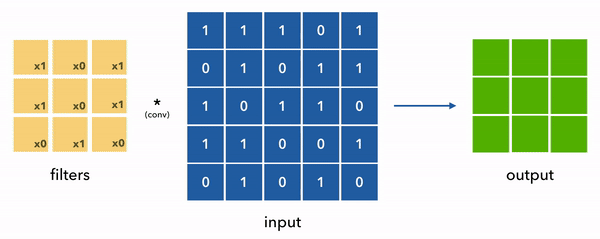

In [127]:
display.Image("drive/MyDrive/Data_Science_Course/Lecture16-ConvNet/images/convolution.gif", width = 900)

Modern deep learning frameworks such as TensorFlow or PyTorch allow to create convolutional layers in one line of code, as follows. 

```
tf.keras.layers.Conv2D(.....)
```

Beside 2D convolutional filters that are used for processing images, 3D convolutional layers are used for analyzing videos, and 1D convolutional layers are used for analyzing time-series data.

The output of a convolutional layer is high-dimensional feature maps, and its dimension depends on the number of convolutional filters used in the layer. For example, if the layer has 32 filters, then we will have 32 feature maps at the output. 

### Pooling layers

Pooling layers are used to reduce the size of the feature maps output by convolutional layers. There are different pooling options, although the most common is the Maxpooling layer, which reduces the image sizes by keeping the pixels with the maximum intensity. 

Implementing a pooling layer in most frameworks is very simple.

```
tf.keras.layers.MaxPooling2D(...)
```

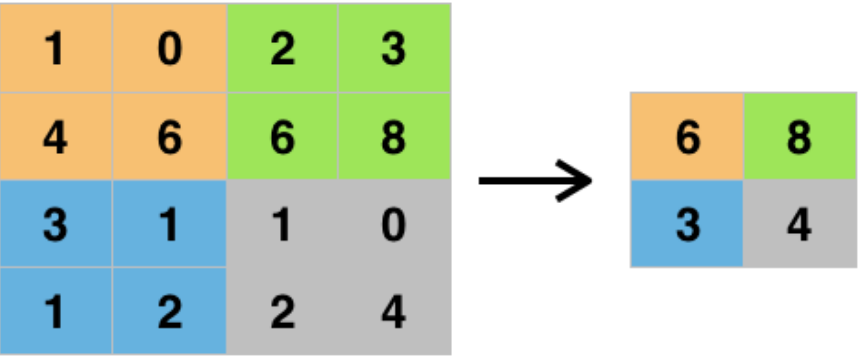

In [129]:
display.Image("drive/MyDrive/Data_Science_Course/Lecture16-ConvNet/images/max-pooling.jpg", width = 500)


### Fully-connected (Dense) layers

The last layers in ConNets are fully-connected layers, that match the produced feature maps from the previous layers to the labels of the original image.


```
tf.keras.layers.Dense(....)
```

<a name='section2'></a>

# 16.2. Loading the Dataset: CIFAR-10

In this notebook, we are going to use one of the most well-known datasets for image classification called `CIFAR-10`. 

CIFAR-10 consists of 60,000 color images in 10 categories. The 10 classes are: `airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck`.

Each class contains 6,000 images. In the dataset, 50,000 images are allocated for training, and 10,000 for testing. The top accuracy on the test dataset is about 90%.

You can learn more about the dataset [here](https://www.cs.toronto.edu/%7Ekriz/cifar.html). 

Note that there is a larger version with 100 classes called CIFAR-100. 

CIFAR-10 is available in Keras built in datasets, so we can simply load the data by using the helper function `keras.datasets.cifar10.load_data()`.

In [2]:
# import required libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Print the version of tf
print("TensorFlow version:{}".format(tf.__version__))
print("Keras version:{}".format(keras.__version__))

TensorFlow version:2.9.2
Keras version:2.9.0


In [3]:
# Load the train and test images and labels
(train_data, train_label), (test_data, test_label) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


As usual, we can inspect the shapes of the training and testing datasets.

Note that each image is a 32x32x3 tensor, having a size of 32x32 pixels and 3 channels corresponding to the RGB (red-green-blue) channels. 

In [5]:
print('Training images', train_data.shape)
print('Training labels', train_label.shape)
print('Testing images', test_data.shape)
print('Testing labels', test_label.shape)

Training images (50000, 32, 32, 3)
Training labels (50000, 1)
Testing images (10000, 32, 32, 3)
Testing labels (10000, 1)


### Data Preprocessing

If we display the values for the pixels in the training dataset, we can see that they are in the range between 0 and 255. The type is `uint8` which stands for unsigned integer with 8 bits, that is, the possible values are between $2^0=1$ and $2^8=256$. This means that each pixel has an intensity value in that range, where 0 is a black pixel, 255 is a white pixel, and all other colors are in between. 

In [6]:
# Display the range of images 
print('Max pixel value', np.max(train_data))
print('Min pixel value', np.min(train_data))
print('Average pixel value', np.mean(train_data))
print('Data type', train_data[0].dtype)

Max pixel value 255
Min pixel value 0
Average pixel value 120.70756512369792
Data type uint8


When processing image data with neural networks, the pixel values are commonly normalized to the [0, 1] range. This allows the networks to train faster and it usually leads to better results. Let's normalize the images by dividing them with the maximum intensity of 255, and check again if the scaled data look correct. Note that the data type after the normalization is `float64`.

In [7]:
# Normalize the images 
train_data = train_data / 255
test_data = test_data / 255

In [8]:
# Display the range of images (to make sure they are in the [0, 1] range)
print('Max pixel value', np.max(train_data))
print('Min pixel value', np.min(train_data))
print('Average pixel value', np.mean(train_data))
print('Data type', train_data[0].dtype)

Max pixel value 1.0
Min pixel value 0.0
Average pixel value 0.4733630004850874
Data type float64


   The labels for the 10 classes in CIFAR-10 are shown below.
   
    | Label | Description |
    | ----- | ----------- |
    | 0     | airplane    |
    | 1     | automobile  |
    | 2     | bird        |
    | 3     | cat         |
    | 4     | deer        |
    | 5     | dog         |
    | 6     | frog        |
    | 7     | horse       |
    | 8     | ship        |
    | 9     | truck       |


Let's inspect the first 10 values in the labels. We can see that each label corresponds to one of the 10 categories. 

Also, in the next cell we plotted the first 200 labels, and we notice that they  have values between 0 and 9, so everything looks good.

In [9]:
print(train_label[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


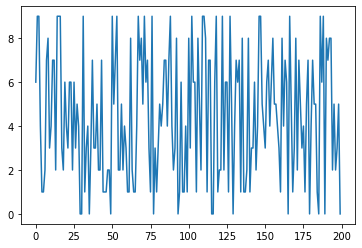

In [10]:
plt.plot(train_label[:200])
plt.show()

We can convert the labels to one-hot encoded values, by using the Keras function `to_categorical`. This transforms each label into a row of 10 values, since there are 10 classes. Note that for the first row now only the column with index 6 is 1, for the second row the last column is 1, etc., and all other values are 0. 

In [11]:
# Convert the labels to one-hot encoding format
train_label_onehot = keras.utils.to_categorical(train_label, 10)
test_label_onehot = keras.utils.to_categorical(test_label, 10)

print('Labels train shape: {}'.format(train_label_onehot.shape))

Labels train shape: (50000, 10)


In [12]:
# Check the labels
train_label_onehot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Let's visualize some images to see what they look like. We can notice that the resolution is quite low, since they are 32x32 pixels.

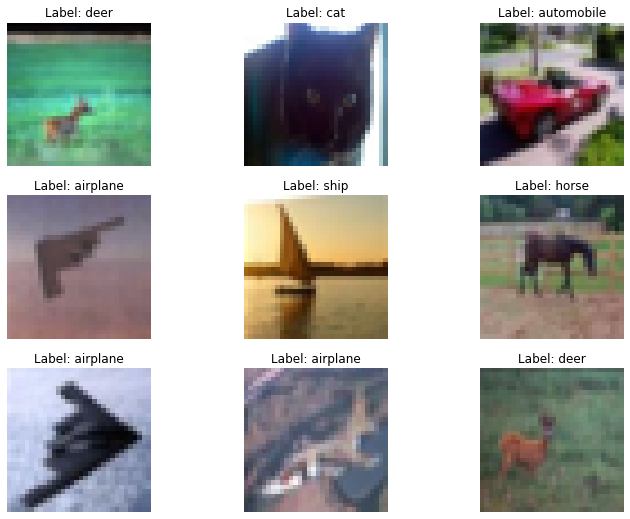

In [13]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot a few images to check them
plt.figure(figsize=(12, 9))
for n in range(9):
    i = np.random.randint(0, len(train_data), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(train_data[i[0]])
    plt.title('Label: ' + str(label_names[train_label[i[0]][0]]))
    plt.axis('off')

<a name='section3'></a>

# 16.3 Creating, Training, and Evaluating a CNN Model

### Create the Model

Next, we are going to define the network architecture with the Keras library, which is a high-level API developed on top of TensorFlow. Keras provides the building blocks for creating, training, and evaluating neural networks with several lines of code. 

The main data structures in Keras are ***layers*** and ***models***.

In the first cell below we imported the layers, and afterward we defined the layers. 

TensorFlow-Keras requires to first define an ***Input*** layer, to provide the size of the data; in this case, the shape of the input data is set to (32,32,3).

Next, we will include a convolutional layer ***Conv2D***. The arguments of Conv2D layer in Keras are:
* filters: define the number of filters in the layer.
* kernel_size: the height and width of each filter, defined as an integer such as kernel_size=3, or a tuple such as kernel_size=(3,3). 
* padding: it is not a very important argument, when it is equal to 'same' it means that the output images are the same size as input images; otherwise, the output images can be slightly smaller.

Next, we will include a pooling layer **MaxPooling2D**. We can specify the pooling size with the `pool_size` argument, such as `pool_size=3`. Otherwise, the default pool size is 2.

ConvNets typically consist of several blocks of convolutional and pooling layers. 

And **Fully Connected Layers** are used for matching the compressed features maps to their labels.

And there is one more layer that is used called ***Flatten***. This layer is needed because the outputs of the convolutional and maxpooling layers are tensors, but the dense layers require one-dimensional data (vectors). The Flatten layer just concatenates all dimensions of a tensor into an 1D array.

For example, the following layer that we defined below,

```
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
```

is a convolutional layer, which takes as input the previous layer named `conv1a`. In the model definition, the output of each previous layer is fed to the next layer. The layer `conv1b` has 32 convolutional filters of size 3, and padding is applied to preserve the size of the images. 

In [14]:
# import the layers
from keras.models import Model
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [16]:
# Define the layers in the model
inputs = Input(shape=(32, 32, 3))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(pool1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)
conv3a = Conv2D(filters=128, kernel_size=3, padding='same')(pool2)
conv3b = Conv2D(filters=128, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)
flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dense2 = Dense(64, activation='relu')(dense1)
outputs = Dense(10, activation='softmax')(dense2)

# Define the model with inputs and outputs
cifar_cnn = Model(inputs, outputs)

Also note that in multi-class classification problems, the last Dense layer has
***softmax*** activation function. Softmax activation outputs a multiclass probability distribution, that is, it computes the probability that an image belongs to one of the 10 classes.

After we defined the layers, we create the model with the `Model` function, for which the arguments are the input and output layers (here we named these layers 'inputs' and 'outputs').

Now that our model is created, we can inspect its architecture with `cifar_cnn.summary()`.

In [17]:
# Model summary
cifar_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                           

### Compile

The model that we defined so far is an empty graph. By compiling the model, we specify the loss function, optimizer, and metric. 

The ***loss function*** (cost function) calculates the difference between the predicted class by the model and the ground-truth target class for each image. If the difference is high, this means a higher loss. The goal of the  training process is to minimize the loss. Classification problems typically use a loss function called cross-entropy. 
In Keras and TensorFlow, there are three main crossentropy losses: 
- `binary_crosssentropy` used for binary classification (i.e., there are only 2 classes).
- `categorical_crossentropy` used for multiclass classification (3 and more classes) and the target labels are encoded in one-hot matrix format.
- `sparse-categorical_crossentropy` used for multiclass classification (3 and more classes) and the target labels are encoded in ordinal format.

Since our data is categorical (i.e., we want to predict a finite number of discrete classes), we use categorical crossentropy.

The ***optimizer*** is the used optimization algorithm to reduce the loss function. In this case we use `Adam` optimizer (which stands for Adaptive Moment Estimation). It is one of the fastest and most commonly used optimizers at present.

We use accuracy as a ***metric***, but we can also use AUC-ROC, or F1 score, or other metrics, if we needed to.

In [18]:
cifar_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

### Train

Now we can train the model. We use the `fit` function as in scikit-learn, and we list the train data and labels, and additional arguments. Here we provided the number of ***epochs*** and ***batch size***. 
The batch size means that the `fit` function will repeatedly randomly select 128 images from the training dataset, and use the batch of images to train the model and update the model parameters. Therefore, for the training dataset of 50,000 images, the updates will be repeated 50,000/128 = 391 times (see this number under the Epoch in the cell output below). When all images in the training dataset are used, that is considered 1 epoch. In this case, the training will continue for 10 epochs.

In [19]:
cifar_cnn.fit(train_data, train_label_onehot, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 15s 13ms/step - loss: 1.4539 - accuracy: 0.4760
Epoch 2/10
391/391 [==============================] - 5s 12ms/step - loss: 0.9783 - accuracy: 0.6566
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7837 - accuracy: 0.7261
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6578 - accuracy: 0.7722
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.5589 - accuracy: 0.8031
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4697 - accuracy: 0.8349
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4029 - accuracy: 0.8593
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3432 - accuracy: 0.8796
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3004 - accuracy: 0.8953
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2547 - accur

### Evaluate on Test Data



If we wish, we can use the `predict` function to output the class for each image, and afterward calculate the accuracy in the same way as with scikit-learn models. 

In [39]:
from sklearn.metrics import accuracy_score

preds = cifar_cnn.predict(test_data)

accuracy = accuracy_score(test_label, np.argmax(preds, axis=1))
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

313/313 [==============================] - 1s 2ms/step
The test accuracy is 73.33 %


We can check the shape of the predicted outputs, and since there are 10,000 test images and 10 classes, the output is (10000,10). Also, we displayed the predictions for the first 5 test images in the next cell. For each image, the model outputs probabilities for each of the 10 classes. The probabilities sum to 1. For instance, for the first test image, the model assigned the highest probability of 0.99 to the class with index 3. For the second image, the model is less confident, and the highest probability of 0.517 is for the class with index 8.

In [22]:
# check the shape of the predictions
preds.shape

(10000, 10)

In [28]:
# display the predictions for the first 5 test images
print('Predictions for first 5 test images:\n', np.around(preds[:5],3))

Predictions for first 5 test images:
 [[0.    0.    0.    0.99  0.    0.009 0.002 0.    0.    0.   ]
 [0.026 0.456 0.    0.    0.    0.    0.    0.    0.517 0.   ]
 [0.013 0.271 0.    0.    0.    0.    0.    0.    0.713 0.003]
 [0.987 0.    0.001 0.    0.    0.    0.    0.    0.012 0.   ]
 [0.    0.    0.    0.    0.006 0.    0.993 0.    0.    0.   ]]


To output the indices with the highest probability for each image we can use `argmax` in numpy. The ground-truth labels are also shown in the next cell, and they match correctly the predictions for these 5 images.

In [35]:
# print the index with highest probability for the first 5 test images
np.argmax(preds[:5], axis=1)

array([3, 8, 8, 0, 6])

In [36]:
# print the ground-truth label for the first 5 test images
test_label[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

Also, in Keras there is a function `evaluate` which is simpler to use for calculating the accuracy. 

In [37]:
# Evaluate on test dataset
evals_test = cifar_cnn.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.0982 - accuracy: 0.7333
Classification Accuracy:  0.733299970626831


The important thing to notice is that the accuracy on the training dataset reached about 90%, while the accuracy on the test dataset is about 73%. This means that the model overfits the training data. That is, the model begins to memorize the training data, and it learned to predict on the training data very well, but the generalization ability on unseen images is quite low. In the next sections we will learn how to deal with that.  

### Plot the Predictions

But first, let's plot a few images and the predicted class labels by the model. 

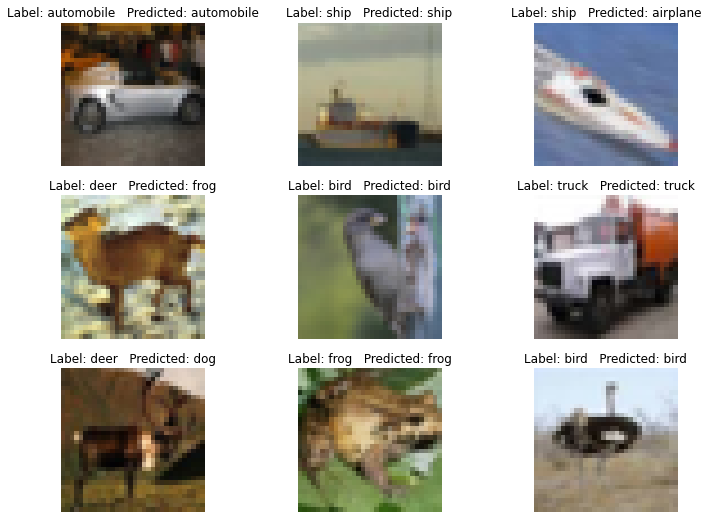

In [40]:
# Plot a few images to check them
plt.figure(figsize=(12, 9))
for n in range(9):
    i = np.random.randint(0, len(test_data), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(test_data[i[0]])
    plt.title('Label: ' + str(label_names[test_label[i[0]][0]]) + '   Predicted: ' + str(label_names[np.argmax(preds[i[0]])]))
    plt.axis('off')

<a name='section4'></a>

# 16.4 Introduce a Validation Dataset

To be able to observe if the model overfits, one more dataset is introduced, referred to as a ***validation dataset***. The original training dataset is typically randomly split, and approximately 70-80% is used as a training dataset, and 20-30% is used as a validation dataset. 

This way, at the end of every epoch, we will calculate the accuracy of the model on the validation dataset. As the model is trained, if the training accuracy increases, but the validation accuracy decreases, it means that the model begins to overfit.

In Keras, the `fit` function has a `validation_split` argument, which allows us to use a percent of the training data for validation. In the next cell, we will use 20%, meaning that out of the 50,000 training images, the model will use 40,000 for training, and 10,000 for validation.

Note also that in the cell below we will just continue training the same model. If we re-defined and re-compiled the model, we would have begun the training from scratch.

Now we can notice the overfitting, because the training accuracy continues to increase, but the validation accuracy decreases.

In [41]:
cifar_cnn.fit(train_data, train_label_onehot, 
              epochs=10, batch_size=128,
              validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 4s 14ms/step - loss: 0.2119 - accuracy: 0.9263 - val_loss: 0.2305 - val_accuracy: 0.9174
Epoch 2/10
313/313 [==============================] - 4s 12ms/step - loss: 0.1918 - accuracy: 0.9333 - val_loss: 0.2815 - val_accuracy: 0.9015
Epoch 3/10
313/313 [==============================] - 4s 12ms/step - loss: 0.1698 - accuracy: 0.9409 - val_loss: 0.3971 - val_accuracy: 0.8797
Epoch 4/10
313/313 [==============================] - 4s 12ms/step - loss: 0.1539 - accuracy: 0.9474 - val_loss: 0.4165 - val_accuracy: 0.8716
Epoch 5/10
313/313 [==============================] - 4s 12ms/step - loss: 0.1563 - accuracy: 0.9476 - val_loss: 0.4712 - val_accuracy: 0.8548
Epoch 6/10
313/313 [==============================] - 4s 12ms/step - loss: 0.1436 - accuracy: 0.9495 - val_loss: 0.5640 - val_accuracy: 0.8499
Epoch 7/10
313/313 [==============================] - 4s 12ms/step - loss: 0.1326 - accuracy: 0.9550 - val_loss: 0.5616 - val_accuracy: 0.8555

In [42]:
# Evaluate on test dataset
evals_test = cifar_cnn.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.6260 - accuracy: 0.7170
Classification Accuracy:  0.7170000076293945


<a name='section5'></a>

## 16.5 Droput Layers

One way to deal with overfitting in neural networks is to introduce ***Dropout*** layers. The idea of dropout is very simple: during the training, at each iteration (processing a batch of images), a portion of the neurons in a layer are randomly disabled. This introduces randomness in the network, and it helps to improve model performance and reduce overfitting. 

Dropout can be considered to be similar to the ensemble methods, where during each iteration, a slightly different model is trained, which uses only a portion of all neurons. 

In the next cell, we add several dropout layers, where for instance, dropout of 0.2 means that 20% of the neurons in that layer are randomly dropped.

In [43]:
from keras.layers import Dropout

# Define the layers
inputs = Input(shape=(32, 32, 3))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)
dropout1 = Dropout(0.2)(pool1)
conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)
dropout2 = Dropout(0.2)(pool2)
conv3a = Conv2D(filters=256, kernel_size=3, padding='same')(dropout2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)
flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dropout3 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dropout3)
dropout4 = Dropout(0.2)(dense2)
outputs = Dense(10, activation='softmax')(dropout4)

# Define the model with inputs and outputs
cifar_cnn_2 = keras.Model(inputs, outputs)

In [44]:
# compile model
cifar_cnn_2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# fit model
history = cifar_cnn_2.fit(train_data, train_label_onehot,
                epochs=40, batch_size=128,
                validation_split=0.2, verbose=0)

In [45]:
# Evaluate on test dataset
evals_test = cifar_cnn_2.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.0668 - accuracy: 0.7536
Classification Accuracy:  0.753600001335144


The performance was slightly increased to about 75.3% from the initial 73.3% for the model without dropout layers.

Let's create a figure with two subplots, to show the accuracy and loss of the model. The blue lines indicate the model performance on the training dataset and the red lines indicate the performance on the validation dataset. 

The plots are called ***learning curves*** and are important for understanding the model performance. It is a good practice to always create a plot after training a model and analyze the learning curves.

We can notice that overfitting begins around epoch 15, when the training accuracy increases, but the validation accuracy stays about the same. Similarly, the training loss decreases, but the validation loss increases after epoch 15. The plots of the accuracy and loss are fairly correlated, however as we can see the accuracy can stay constant when the loss is changing. 

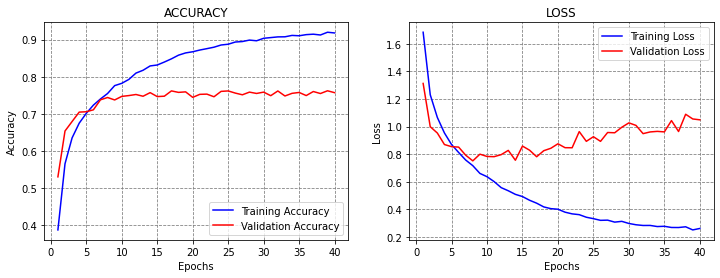

In [47]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

<a name='section6'></a>

# 16.6 Batch Normalization

Another type of layers that are used to reduce overfitting are ***Batch Normalization*** layers. 

Similarly to scaling the input features to range [0,1] or to a Gaussian distribution with 0 mean and 1 standard deviation, Batch Normalization layers scale a batch of data to have 0 mean and 1 standard deviation. This reduces the instability in training the network due to differences among batches of data, and also reduces the overfitting.

In [79]:
from keras.layers import BatchNormalization

# Define the layers
inputs = Input(shape=(32, 32, 3))
conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(conv1a)
bn1 = BatchNormalization()(conv1b)
pool1 = MaxPooling2D()(bn1)
dropout1 = Dropout(0.2)(pool1)
conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(conv2a)
bn2 = BatchNormalization()(conv2b)
pool2 = MaxPooling2D()(bn2)
dropout2 = Dropout(0.2)(pool2)
conv3a = Conv2D(filters=256, kernel_size=3, padding='same')(dropout2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same')(conv3a)
bn3 = MaxPooling2D()(conv3b)
pool3 = MaxPooling2D()(bn3)
flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dropout3 = Dropout(0.2)(dense1)
dense2 = Dense(64, activation='relu')(dropout3)
dropout4 = Dropout(0.2)(dense2)
outputs = Dense(10, activation='softmax')(dropout4)

# Define the model with inputs and outputs
cifar_cnn_3 = keras.Model(inputs, outputs)

In [50]:
# compile model
cifar_cnn_3.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

Also, let's use the argument `verbose=0` to not display the loss and accuracy after every epoch. Instead, after the training is complete, we will display the learning curves to observe the performance of the model. We increased the number of epochs to 60 for this model.

And, we will use the `datatime` python library to measure and display the training time of the model. 

In [51]:
import datetime
now = datetime.datetime.now

t = now()
# fit model
history = cifar_cnn_3.fit(train_data, train_label_onehot,
                epochs=60, batch_size=128,
                validation_split=0.2, verbose=0)
	
print('Training time: %s' % (now() - t))

Training time: 0:05:23.402299


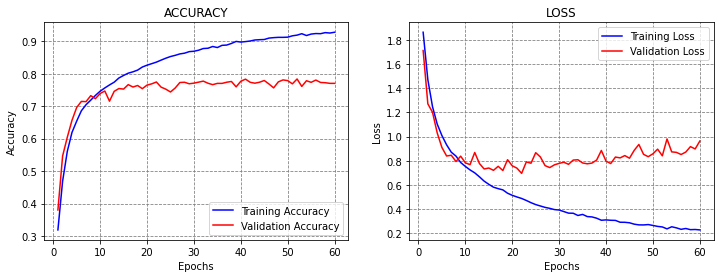

In [52]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

In [53]:
# Evaluate on test dataset
evals_test = cifar_cnn_3.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9653 - accuracy: 0.7684
Classification Accuracy:  0.7684000134468079


With the Batch Normalization layers in the model, the test accuracy increased to 76.8%.

<a name='section7'></a>

# 16.7 Data Augmentation

One of the main reasons for overfitting is the lack of sufficient training samples, or lack of diversity in the training samples, for training a model. 

To deal with overfitting we can use ***data augmentation***, which refers to expanding the existing dataset by applying different image transformation operations. Examples are flipping the image vertically or horizontally, cropping the image, changing the contrast and color of the image, adding noise to the image, rotating the image at a given degree, and similar. 

![Image Augmentation](https://cdn.hashnode.com/res/hashnode/image/upload/v1623166213173/JTRR1Btgm.png)

By doing data augmentation, we are synthesizing new images from existing data, as well as introducing some diversity in the images.

Keras provides the function `ImageDataGenerator` for data augmentation. Some of the operations for data augmentation include:
* **rotation_range** is a value in degrees (0–180) to randomly rotate images.
* **width_shift** and **height_shift** are ranges of fraction of total width or height within which to translate pictures, either vertically or horizontally.
* **shear_range** is for applying shearing randomly.
* **zoom_range** is for zooming in pictures randomly. 
* **horizontal_flip** and **vertical_flip** are for flipping images.

In the example below we applied width shift, height shift, and horizontal flip.

In [54]:
from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)	

ImageDataGenerator returns both the augmented images and their labels for each batch of images. 

Let's plot a few images to see what they look like. They don't look much different, but that is because the applied shift and flip are not very large, and we didn't use other operations.

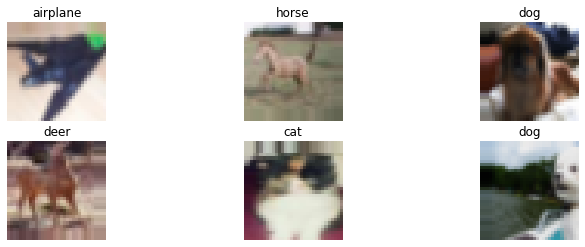

In [78]:
# Get images in batch of 20
aug_iterator = datagen.flow(train_data, train_label, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(aug_iterator[i][0][0])
        plt.title(str(label_names[aug_iterator[i][1][0][0]]))
        plt.axis("off")

When we use data augmentation, the arguments in the `fit` function are slightly different. First, we need to provide the name of our defined generator with `flow` to yield a batch of augmented images. 

We also need to specify `steps_per_epoch`, which oftentimes is just the number of training images divided by the batch size. 

Also, the generator in Keras does not accept a `validation_split` argument, and therefore we need to manually create a validation dataset, and then use it. This has been done in the next cells. 

In [80]:
# Define the model with inputs and outputs
cifar_cnn_4 = keras.Model(inputs, outputs)

# compile model
cifar_cnn_4.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [82]:
# fit model
history = cifar_cnn_4.fit_generator(datagen.flow(train_data, train_label, batch_size=128),
                steps_per_epoch=len(train_data)/128, epochs=120,
                validation_split=0.2, verbose=0)

# note that the generator does not work with validation split

TypeError: ignored

In [83]:
from sklearn.model_selection import train_test_split

train_data_1, validation_data_1, train_label_1, validation_label_1 = train_test_split(train_data, train_label_onehot, test_size=0.2, random_state=20, stratify=train_label_onehot)

In [84]:
print('Training images', train_data_1.shape)
print('Training labels', train_label_1.shape)
print('Validation_images', validation_data_1.shape)
print('Validation labels', validation_label_1.shape)

Training images (40000, 32, 32, 3)
Training labels (40000, 10)
Validation_images (10000, 32, 32, 3)
Validation labels (10000, 10)


In [85]:
import datetime
now = datetime.datetime.now

t = now()
# fit model
history= cifar_cnn_4.fit(datagen.flow(train_data_1, train_label_1, batch_size=128),
                steps_per_epoch=len(train_data_1)/128, epochs=100,
                validation_data=(validation_data_1, validation_label_1), verbose=0)
	
print('Training time: %s' % (now() - t))

Training time: 0:30:54.188271


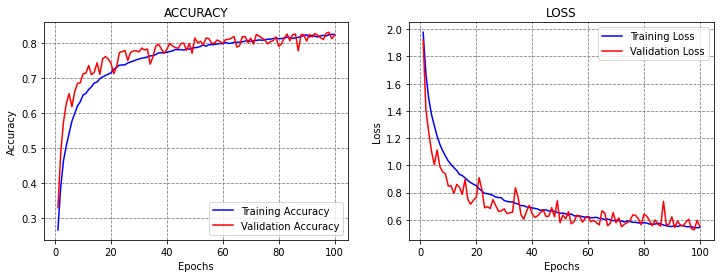

In [86]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

In [89]:
# Evaluate on test dataset
evals_test = cifar_cnn_4.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.5613 - accuracy: 0.8156
Classification Accuracy:  0.8155999779701233


The data augmentation was helpful to further improve the performance of the model to about 81.5% accuracy. We trained the model for 100 epochs, which took about 30 minutes. From the learning curves we can conclude that the accuracy was still increasing at epoch 100, therefore we could continue training the model, or we could have selected a higher number of epochs initially.

<a name='section8'></a>

# 16.8 Transfer Learning

***Transfer learning*** uses pretrained models that are trained on very large datasets to improve the performance on smaller datasets. 

There are many pretrained models available in Keras Applications.

Typical steps in transfer learning include:
* Initialize the pretrained model (base model) and weights, and remove the top layers (fully-connected layers) of the pretrained model.
* Create a new model by adding new trainable fully-connected layers on top of the primary model.
* Train the new model, and evaluate the performance. 

In this case we will use the VGG16 model, which is popular for image classification. The model is imported with the weights pretrained on ImageNet, which is a very large dataset with 1.2 million images in 1,000 classes. Since our task has only 10 classes, we will remove the dense layers which are very specific to ImageNet's 1,000 classes, and add our own custom layers with 10 classes.


In [110]:
from tensorflow.keras.applications import vgg16
from keras.layers import GlobalAveragePooling2D

base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

# The model we will train
cifar_cnn_5 = Model(inputs=base_model.input, outputs=predictions)

### Callbacks

Keras has implemented several callbacks that allow to monitor the training process and have more control over it.

These include:
- *EarlyStopping*, monitor a metric (e.g., validation loss) and if it doesn't improve for a certain number of epochs (the patience argument), terminate the training. By improve, we mean the decrease if the metric is loss, or increase if the metric is accuracy. 
- *ModelCheckpoint*, monitor a metric, and after every epoch when the metric improves, save the model.
- *LearningRateScheduler*, define a schedule to change the learning rate during the training process (e.g., start with a higher learning rate, and reduce it gradually).
- *ReduceLROnPlateau*, reduce the learning rate when a metric stops improving (e.g., the accuracy stays constant for 10 epochs).
- *CSVLogger*, saves the results after every epoch to a CSV file.

We can use several callbacks in the same `fit` function. For instance, we can combine ReduceLROnPlateau with EarlyStopping, where the learning rate will be reduced if a metric does not improve, and when we reach certain minimal learning rate and the metric does not improve, we terminate the training.

In [111]:
from keras.callbacks import EarlyStopping

cifar_cnn_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# fit model
t = now()
history = cifar_cnn_5.fit(train_data, train_label_onehot, validation_split=0.2, batch_size=128, 
                    epochs=100, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])

print('Training time: %s' % (now() - t))

Training time: 0:05:34.850791


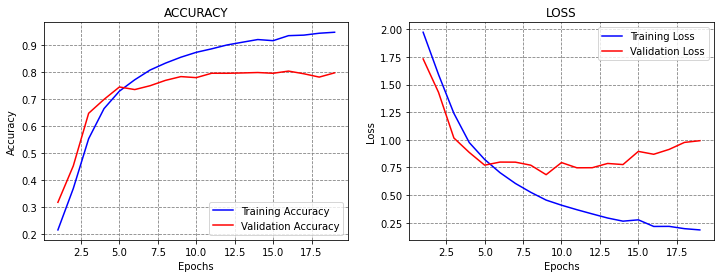

In [112]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

In [113]:
# Evaluate on test dataset
evals_test = cifar_cnn_5.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 3s 9ms/step - loss: 1.0944 - accuracy: 0.7869
Classification Accuracy:  0.786899983882904


Although the accuracy is reduced, note that the model was trained in about 15 epochs, in comparison to 100 epochs or more epochs when trained from scratch.

The following figure illustrates the early stopping callback. When the validation loss starts increasing, terminate the training. In our case, the validation loss reached minimum at epoch 8, and since we specified a 10 epochs patience, the model stopped at epoch 18. It seems that the patience was too large for this model.

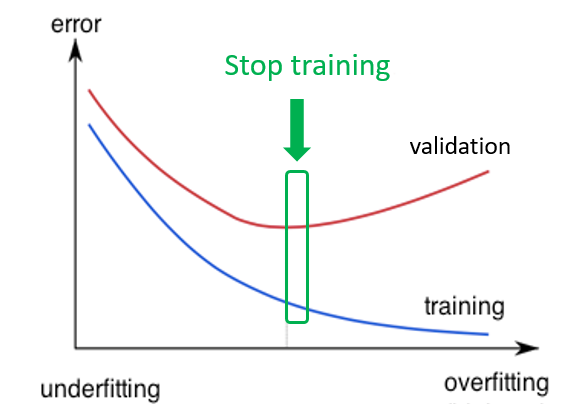

In [126]:
display.Image("drive/MyDrive/Data_Science_Course/Lecture16-ConvNet/images/early_stopping.png", width=400)

Let's try to use a pretrained model and combine it with data augmentation.

In [103]:
# The model we will train
cifar_cnn_6 = Model(inputs=base_model.input, outputs=predictions)

In [104]:
# compile model
cifar_cnn_6.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [105]:
import datetime
now = datetime.datetime.now

t = now()
# fit model
history= cifar_cnn_6.fit(datagen.flow(train_data_1, train_label_1, batch_size=128),
                steps_per_epoch=len(train_data_1)/128, epochs=100,
                validation_data=(validation_data_1, validation_label_1), verbose=0,
                callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])
	
print('Training time: %s' % (now() - t))

Training time: 0:18:56.769846


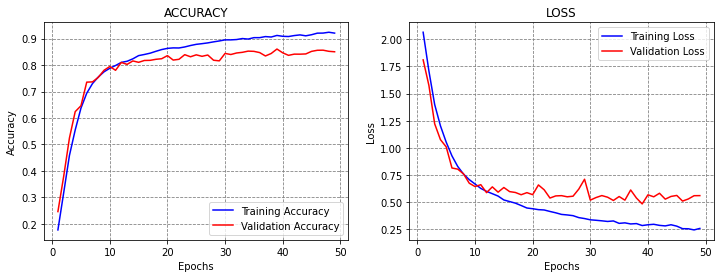

In [108]:
# plot the accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()            
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b', label='Training Loss')
plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show() 

In [107]:
# Evaluate on test dataset
evals_test = cifar_cnn_6.evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.5629 - accuracy: 0.8544
Classification Accuracy:  0.8543999791145325


Combining transfer learning with data augmentation increased the accuracy to over 85%.

<a name='section9'></a>

# 16.9 Saving and Loading the Model

To save a model in Keras, we simply use the `save` method, and provide the path to the directory. 

The saved model contains the architecture with the layers, the weights for all layers in the model, and other information related to the used otpimizer, loss, and metrics. 

There are two possible formats to save the models into: HDF5 and TensorFlow SavedModel. If we provide the `h5` extension, then the saved model format is HDF5. If we provide the `tf` extension, or if we don't provide any extension, the model will be saved into TensorFlow SavedModel format. TensorFlow SavedModel is the default, and it is recommended, since it is a newer format, and it saves additional information that is not included in the `h5` file, such as losses and metrics (e.g., they can be useful if we wish to resume training).

We will use the HDF5 format below, just to show how it works.

In [115]:
# Saving a model
cifar_cnn_6.save('my_Cifar10_model1.h5')

To load a saved model we can use the `load_model` method. It returns the architecture and weights of the saved model. 

We can use the loaded model to evaluate it on new data. Evaluation on the test dataset is shown in the next cell, as well as the summary of the model is displayed below.

In [116]:
# Loading a saved model
from keras.models import load_model

cifar_model1 = load_model('my_Cifar10_model1.h5')

In [118]:
# Evaluate on test dataset
evals_test = cifar_model1 .evaluate(test_data, test_label_onehot)
print("Classification Accuracy: ", evals_test[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.5324 - accuracy: 0.8520
Classification Accuracy:  0.8519999980926514


In [117]:
cifar_model1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0  

<a name='section10'></a>

# References

1. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).
2. How to Develop a CNN from Scratch for CIFAR-10 Photo Classification, Jason Brownlee, available at: [https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/).
3. Python Machine Learning (2nd Ed.) Code Repository, Sebastian Raschka, available at: [https://github.com/rasbt/python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition). 


[BACK TO TOP](#section0)